

## Architecture of DQN and Dueling DQN (DDQN)
##### These AI Agents are "Visual Learners"!
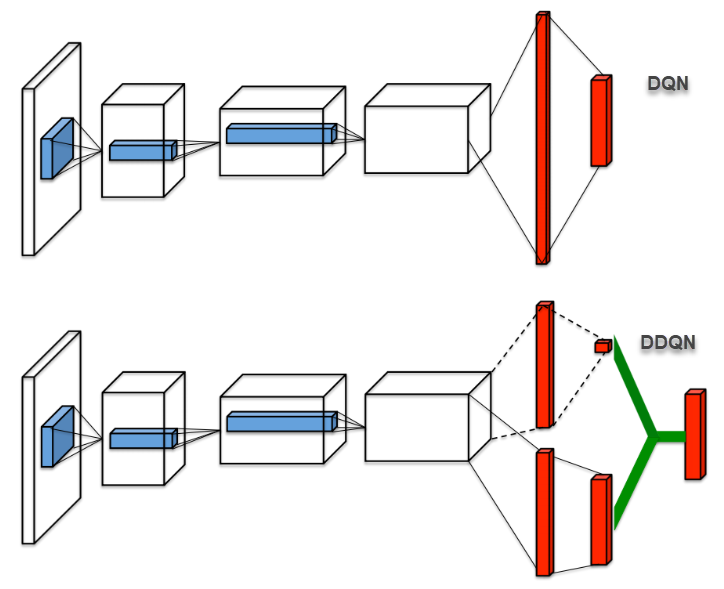

In [1]:
import numpy as np 
import cv2 
import pyautogui 
import matplotlib.pyplot as plt
import pydirectinput
import tensorflow as tf

(<matplotlib.image.AxesImage at 0x27a9a531d68>, (716, 256, 3))

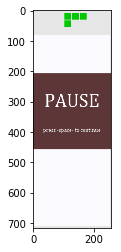

In [3]:
start_screen = cv2.imread('images/start_screen.png')
plt.imshow(start_screen), start_screen.shape

In [5]:
class ToBeImplemented(Exception):
    pass

## Get Tetris Images and Locate Game Screen
Find the game screen so that we can save images of the game to feed to the neural network. 

In [6]:
import time

def locate_game_window(image_dir='images/start_screen.png',debug=True):
        
        # Start Screen dimensions
        start_h, start_w, _ = cv2.imread(image_dir).shape
    
        while True:
            # Find start screen
            location= pyautogui.locateOnScreen(image_dir, 
                                        grayscale=False, confidence=0.95) 
            if location != None and location[2:] == (start_w,start_h):
                if debug:
                    print(f"I can see it at {location}")
                return location
            
            # If Start Screen can't be found
            else:
                print("I am unable to see it")
                time.sleep(1)
            

            
def game_over(terminal_dir='images/game_over.png', debug=False):
    
    # Find Game Over
    location= pyautogui.locateOnScreen(terminal_dir, 
                                grayscale=False, confidence=0.95) 

    if location != None:

        if debug:
            print(f"I can see it at {location}")
            
        return True

    # If Game Over can't be found
    else:
        return False

def select_match(match_dir1="images/single_player.png",
                match_dir2="images/single_player2.png", debug=False):
    
    # Match dimensions
    start_h, start_w, _ = cv2.imread(match_dir1).shape

    # Find Match
    location1= pyautogui.locateCenterOnScreen(match_dir1, 
                                grayscale=False, confidence=0.95) 
    location2=  pyautogui.locateCenterOnScreen(match_dir2, 
                                grayscale=False, confidence=0.95) 
    
    if (location1 != None):
        
        
        if debug:
            print(f"I can see it at {location1}")
            
        return location1
    
    elif location2 != None:
        
        if debug:
            print(f"I can see it at {location2}")
        
        return location2
    
    # If Match can't be found
    else:
        
        time.sleep(2)
        
        return None

## Environment Functions

In [7]:
def get_score(last_score=None, score_loc=None, score_dir='images/score.png'):
    
    if type(last_score) != np.ndarray:
        # Find Score
        score_loc = pyautogui.locateOnScreen(score_dir, 
                                    grayscale=False, confidence=0.95) 
        current_score = np.array(pyautogui.screenshot(region = tuple(score_loc)))
        return 0, current_score, score_loc
    else:
        current_score = np.array(pyautogui.screenshot(region = tuple(score_loc)))
        
        if np.array_equal(last_score, current_score):
            ## Reward = -0.1
            return -0.1, current_score, score_loc
        else:
            ## Reward = 5
            return 5, current_score, score_loc

def sample_space():
    
    actions = ['left', 'right', 'down', 'rotate']
    action = np.random.randint(len(actions))
    
    if action == 2:
        pydirectinput.keyDown('down')
        time.sleep(0.2)
        pydirectinput.keyUp('down')
    else:
        pydirectinput.press(actions[action])
   
        
def save_frame(game_loc=None, game_image='images/start_screen.png', 
               debug=False):

    if debug == False:
        ## Screenshot at game screen coordinates
        screenshot = pyautogui.screenshot(region = tuple(game_loc))
        return np.array(screenshot)
    
    else:
        for i in range(10):
            ## Screenshot at game screen coordinates
            pic = pyautogui.screenshot(region = tuple(game_loc))
            screenshot = cv2.cvtColor(np.array(pic), 
                                 cv2.COLOR_RGB2BGR) 
            ## Save image
            cv2.imwrite(f"images/screenshot_{i}.png", screenshot) 

            if debug:
                print(f"Saved img: 'images/screenshot_{i}.png'")
            time.sleep(3)

In [8]:
def click(coordinates):
    
    pyautogui.moveTo(coordinates[0],coordinates[1])
    pyautogui.click()


In [11]:
## Open game.exe

def game_loop(episodes = 10000):
    
    terminal = False
    game_loc = None
    for episode in range(episodes):
        
        if terminal:
            click(match_loc)
            pydirectinput.press('esc')

        ## Select Match in Menu to Start the Game
        while True:
            match_loc = select_match()
            if match_loc != None:
                click(match_loc)
                pyautogui.moveTo(2000,100)
                if game_loc == None:
                    game_loc = locate_game_window(debug=False)
                pydirectinput.press('Space')
                break
                
        terminal = False
        state = save_frame(game_loc)
        score_img = None
        score_loc = None
        while terminal == False:
       
            ## Take a frame and feed it into network
            ## -- state = frame
            ## -- action = choose_action() // based on policy
            ## -- reward is some small negative + score delta
            ## -- state_p is frame after the action
            ## -- terminal = game_over()
            
            action = sample_space()
            time.sleep(0.01)
            reward, score_img, score_loc= get_score(score_img, score_loc)
            state_p = save_frame(game_loc)
            
            state_p = state
            
            ## Check if the Game is Over
            terminal = game_over()
           
            ## Delay, maybe dont need it
            time.sleep(0.25)

In [12]:
game_loop()

KeyboardInterrupt: 